Initial Proximity Matrix:
[[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]

Merging clusters [4] and [5]:
New cluster: [4, 5]
Updated Proximity Matrix:
[[ 0.  4.  7.  9. 24.  0. 24.]
 [ 4.  0.  3.  5. 20.  0. 20.]
 [ 7.  3.  0.  2. 17.  0. 17.]
 [ 9.  5.  2.  0. 15.  0. 15.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [24. 20. 17. 15.  1.  0.  0.]
 [24. 20. 17. 15.  0.  0.  0.]]

Merging clusters [2] and [3]:
New cluster: [2, 3]
Updated Proximity Matrix:
[[0. 4. 7. 0. 9. 7.]
 [4. 0. 3. 0. 5. 3.]
 [0. 0. 0. 2. 0. 0.]
 [7. 3. 2. 0. 2. 0.]
 [9. 5. 2. 0. 0. 0.]
 [7. 3. 0. 0. 0. 0.]]

Merging clusters [4, 5] and [2, 3]:
New cluster: [4, 5, 2, 3]
Updated Proximity Matrix:
[[0. 4. 7. 0. 7.]
 [4. 0. 3. 0. 3.]
 [0. 0. 0. 2. 0.]
 [0. 0. 2. 0. 0.]
 [7. 3. 0. 0. 0.]]

Merging clusters [1] and [4, 5, 2, 3]:
New cluster: [1, 4, 5, 2, 3]
Updated Proximity Matrix:
[[0. 4. 0. 4.]
 [0. 0. 3. 0.]
 [4. 3.

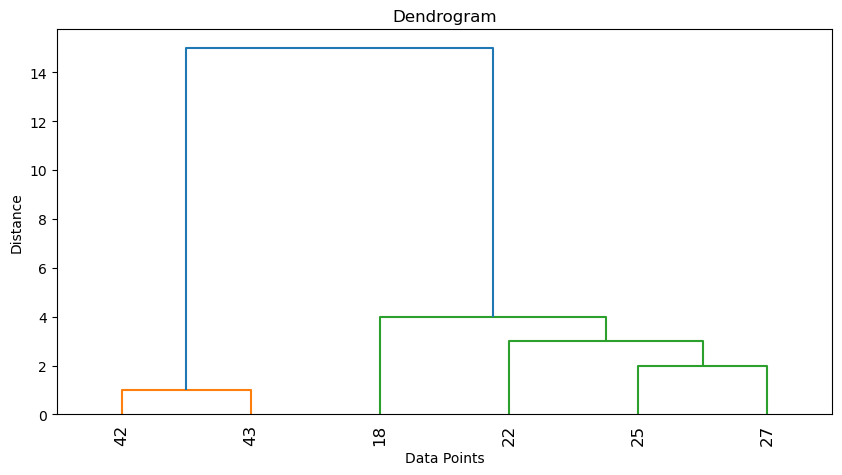

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Data points
data = np.array([18, 22, 25, 27, 42, 43])

# Step 1: Compute the proximity (distance) matrix
def compute_proximity_matrix(data):
    n = len(data)
    proximity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            proximity_matrix[i, j] = abs(data[i] - data[j])
            proximity_matrix[j, i] = proximity_matrix[i, j]
    return proximity_matrix

proximity_matrix = compute_proximity_matrix(data)
print("Initial Proximity Matrix:")
print(proximity_matrix)

# Step 2: Agglomerative Hierarchical Clustering
clusters = [[i] for i in range(len(data))]
while len(clusters) > 1:
    # Find the minimum distance in the proximity matrix
    min_dist = np.inf
    to_merge = None
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dist = proximity_matrix[clusters[i][0], clusters[j][0]]
            if dist < min_dist:
                min_dist = dist
                to_merge = (i, j)

    # Merge the closest clusters
    i, j = to_merge
    new_cluster = clusters[i] + clusters[j]
    clusters.append(new_cluster)

    # Print current clusters and proximity matrix
    print(f"\nMerging clusters {clusters[i]} and {clusters[j]}:")
    print(f"New cluster: {new_cluster}")

    # Update the proximity matrix
    new_proximity_matrix = np.zeros((len(clusters), len(clusters)))

    # Copy old proximity matrix values
    for k in range(len(clusters) - 1):
        for l in range(len(clusters) - 1):
            if k < i and l < j:
                new_proximity_matrix[k, l] = proximity_matrix[k, l]
            elif k < i and l > j:
                new_proximity_matrix[k, l] = proximity_matrix[k, l - 1]
            elif k > i and l < j:
                new_proximity_matrix[k, l] = proximity_matrix[k - 1, l]
            elif k > i and l > j:
                new_proximity_matrix[k, l] = proximity_matrix[k - 1, l - 1]

    # Update distances for the new cluster
    for k in range(len(clusters) - 1):
        if k != i and k != j:
            dist = min(proximity_matrix[clusters[k][0], clusters[i][0]],
                        proximity_matrix[clusters[k][0], clusters[j][0]])
            new_proximity_matrix[k, len(clusters) - 1] = dist
            new_proximity_matrix[len(clusters) - 1, k] = dist

    # Set the distance for the new cluster
    new_proximity_matrix[i, j] = new_proximity_matrix[j, i] = min_dist

    # Update proximity matrix for the next iteration
    proximity_matrix = new_proximity_matrix
    print("Updated Proximity Matrix:")
    print(proximity_matrix)

    # Remove the merged clusters from the list
    clusters.pop(max(i, j))  # Remove the higher index first
    clusters.pop(min(i, j))  # Then remove the lower index

# Dendrogram Visualization
linked = linkage(data.reshape(-1, 1), 'single')
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=data, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


Distance Matrix:
[[ 0.          2.23606798  8.          6.32455532  6.08276253 10.
   7.61577311  7.28010989  3.        ]
 [ 2.23606798  0.          6.08276253  5.          4.          7.81024968
   6.08276253  5.09901951  2.82842712]
 [ 8.          6.08276253  0.          8.48528137  2.23606798  6.
   8.60232527  2.23606798  8.54400375]
 [ 6.32455532  5.          8.48528137  0.          6.40312424  6.
   1.41421356  6.40312424  3.60555128]
 [ 6.08276253  4.          2.23606798  6.40312424  0.          5.38516481
   6.70820393  1.41421356  6.32455532]
 [10.          7.81024968  6.          6.          5.38516481  0.
   5.09901951  4.12310563  8.54400375]
 [ 7.61577311  6.08276253  8.60232527  1.41421356  6.70820393  5.09901951
   0.          6.40312424  5.        ]
 [ 7.28010989  5.09901951  2.23606798  6.40312424  1.41421356  4.12310563
   6.40312424  0.          7.07106781]
 [ 3.          2.82842712  8.54400375  3.60555128  6.32455532  8.54400375
   5.          7.07106781  0.        

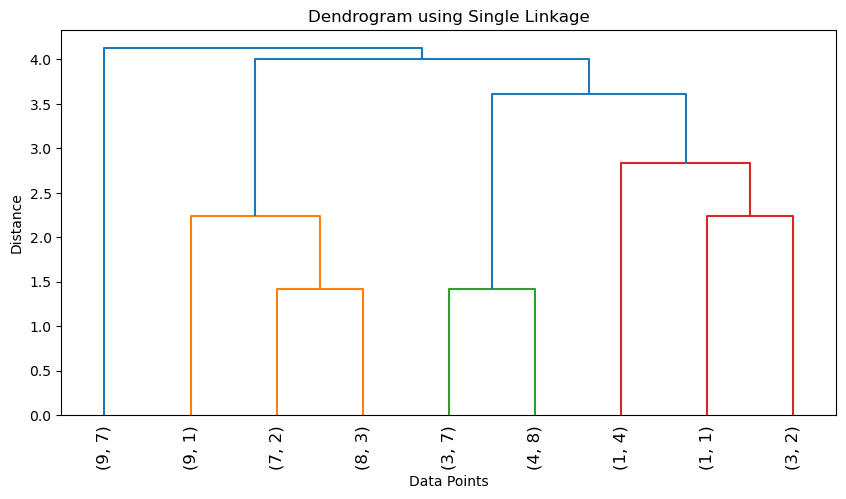

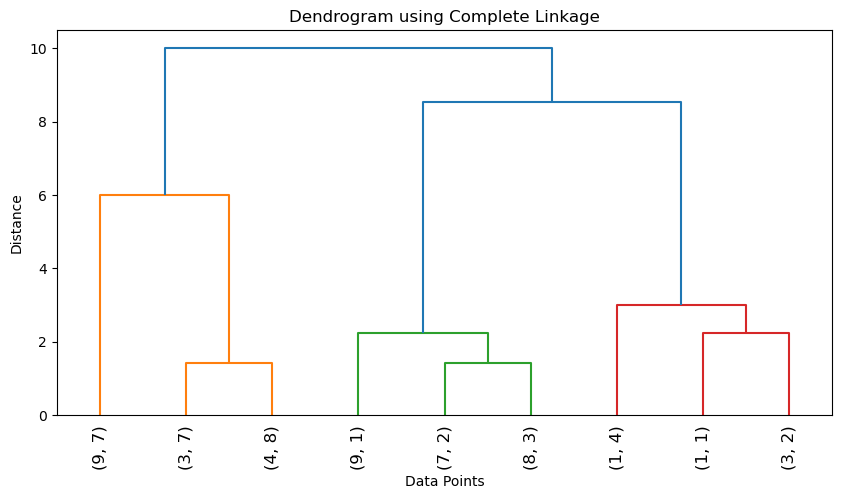

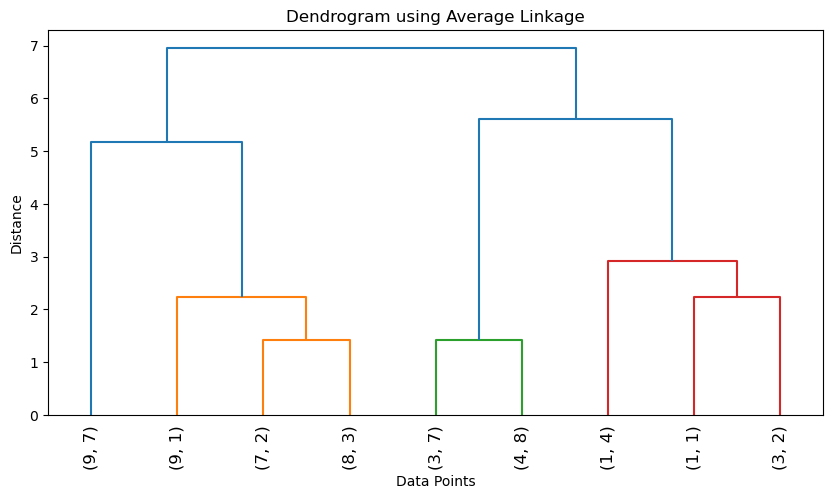

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances

# Define the dataset
data = np.array([
    [1, 1],
    [3, 2],
    [9, 1],
    [3, 7],
    [7, 2],
    [9, 7],
    [4, 8],
    [8, 3],
    [1, 4]
])

# Calculate the distance matrix using Euclidean distance
distance_matrix = pairwise_distances(data)

# Print the distance matrix
print("Distance Matrix:")
print(distance_matrix)

# Define a function to create dendrograms
def plot_dendrogram(method):
    linked = linkage(data, method)
    plt.figure(figsize=(10, 5))
    dendrogram(linked, labels=[f'({x[0]}, {x[1]})' for x in data], leaf_rotation=90)
    plt.title(f'Dendrogram using {method.capitalize()} Linkage')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

# Plot dendrograms for different linkage methods
for method in ['single', 'complete', 'average']:
    plot_dendrogram(method)


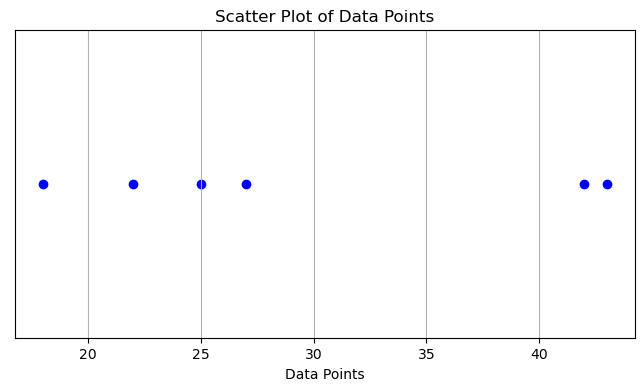

Euclidean Distance Matrix:
[[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]

Manhattan Distance Matrix:
[[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]

Minkowski Distance Matrix (p=3):
[[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]


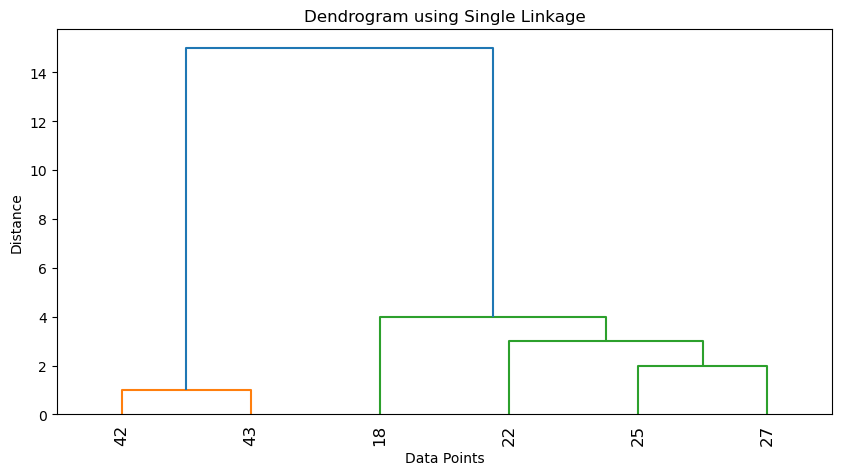

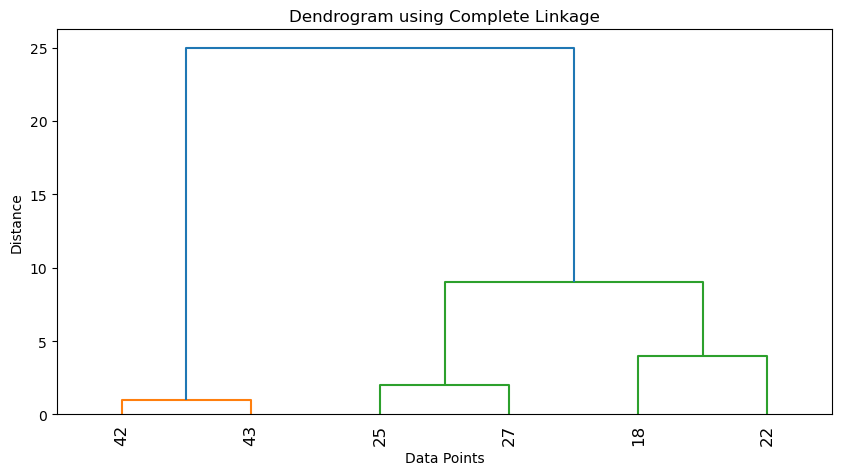

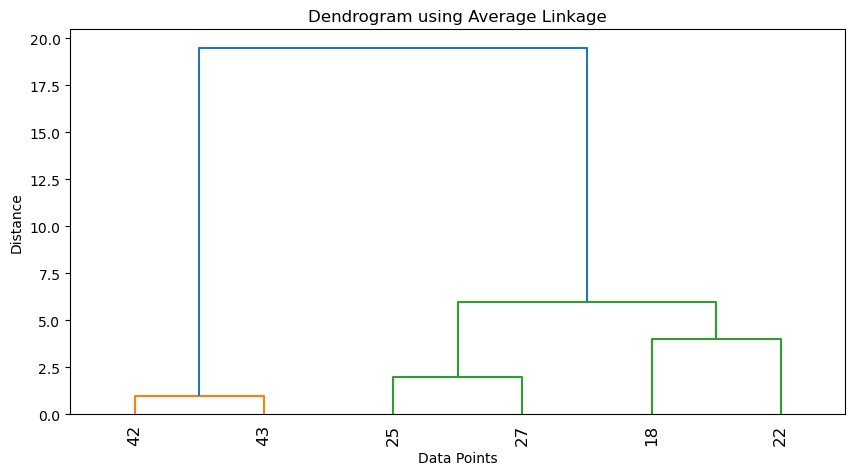

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances

# Define the dataset
data = np.array([18, 22, 25, 27, 42, 43]).reshape(-1, 1)  # Reshape for distance calculations

# a. Plot a scatter graph of the given data points
plt.figure(figsize=(8, 4))
plt.scatter(data, np.zeros_like(data), color='blue', marker='o')
plt.title('Scatter Plot of Data Points')
plt.xlabel('Data Points')
plt.yticks([])  # Hide y-axis ticks
plt.grid()
plt.show()

# b. Display the proximity matrix using different distance metrics
# Calculate distance matrices
euclidean_dist = pairwise_distances(data, metric='euclidean')
manhattan_dist = pairwise_distances(data, metric='manhattan')
minkowski_dist = pairwise_distances(data, metric='minkowski', p=3)  # p can be adjusted

# Print the proximity matrices
print("Euclidean Distance Matrix:")
print(euclidean_dist)

print("\nManhattan Distance Matrix:")
print(manhattan_dist)

print("\nMinkowski Distance Matrix (p=3):")
print(minkowski_dist)

# c. Plot the dendrogram for single, complete, and average linkage methods
def plot_dendrogram(method):
    linked = linkage(data, method)
    plt.figure(figsize=(10, 5))
    dendrogram(linked, labels=data.flatten(), leaf_rotation=90)
    plt.title(f'Dendrogram using {method.capitalize()} Linkage')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

# Plot dendrograms for different linkage methods
for method in ['single', 'complete', 'average']:
    plot_dendrogram(method)
